##### Lending Club Data Project

# 3 Modelling

__Content__ <br>
3.1 Data Import <br>
3.2 Train-Test-Split for Training Data <br>
3.3 SMOTE <br>
3.4 Baseline Model: Dummy Classifier <br>
3.5 Feature Selection <br>
3.6 Logistic Regression (5 Features)<br>
3.7 Logistic Regression (10 Features)<br>
3.8 KNN (5 Features)<br>
3.9 KNN (10 Features)<br>
3.10 Ensemble: AdaBoost <br>
3.11 Ensemble: Stacking <br>

### 3.1 Import training data

In [2]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import statsmodels.formula.api as smf

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
import re 
import math

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif
pd.set_option('display.max_columns', None)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix, fbeta_score

In [3]:
X_train = pd.read_csv('train_data_rescaled.csv')
y_train = pd.read_csv('y_train.csv')
X_train.head()

,Unnamed: 0,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,term,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_unknown,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_IL,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0,-0.403061,-0.367347,-0.891304,-0.361449,-0.5,-0.7899,0.0,-0.400000,0.0,-1.0,-1.000000,0.0,-0.546581,-0.123932,-0.733333,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-0.709184,-0.673469,0.894928,-0.663813,1.5,-1.1799,0.0,-0.436538,0.0,0.0,-1.000000,0.0,-0.478905,1.057692,-1.066667,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,-0.158163,-0.122449,-1.050725,-0.089012,-0.5,-0.1999,0.0,-0.566346,0.0,-1.0,0.000000,0.0,-0.121236,-0.732906,-0.266667,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,0.005102,0.040816,-0.782609,0.124841,-0.5,-0.6498,-1.0,-1.291346,0.0,-1.0,-0.166667,0.0,-0.672444,-1.051282,-0.466667,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,-0.505102,-0.469388,0.456522,-0.412665,0.5,-1.0299,-1.0,-0.535577,0.0,0.0,-0.833333,0.0,-0.393115,0.950855,-0.666667,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train.drop(['Unnamed: 0'], inplace = True, axis = 1)
y_train.drop('Unnamed: 0', inplace = True, axis = 1)

### 3.2 Train-Test-Split for Training Data

Since we have a large data set, the train data is split once again to have an evaluation dataset for the training data.

In [5]:
from sklearn.model_selection import train_test_split
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_train, y_train, test_size = .2, random_state = 42, stratify = y_train)

### 3.3 SMOTE 

The data is very imbalanced so we use the SMOTE (Synthetic Minority Oversampling Technique) method to address this issue. SMOTE synthesizes new datasets from the existing examples, oversampling the minority class (0 = charged off). 

In [6]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


In [7]:
import imblearn


In [8]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(ye_train.loan_status==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(ye_train.loan_status==0)))

sm = SMOTE(random_state=2)
X_smo, y_smo = sm.fit_sample(Xe_train, ye_train.values.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_smo.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smo.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smo==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smo==0)))

Before OverSampling, counts of label '1': 16227
Before OverSampling, counts of label '0': 2698 

After OverSampling, the shape of train_X: (32454, 90)
After OverSampling, the shape of train_y: (32454,) 

After OverSampling, counts of label '1': 16227
After OverSampling, counts of label '0': 16227


### 3.4 Baseline Model: Dummy Classifier

The dummy classifier uses simple classification rules and is therefore useful as a simple baseline to compare with other (real) classifiers. It is not used for 'real' modelling. Since it is a baseline model, the original data wihtout SMOTE are used.

              precision    recall  f1-score   support

         0.0       0.14      0.14      0.14       675
         1.0       0.86      0.86      0.86      4057

    accuracy                           0.76      4732
   macro avg       0.50      0.50      0.50      4732
weighted avg       0.76      0.76      0.76      4732

F beta Score for both classes:
0.76


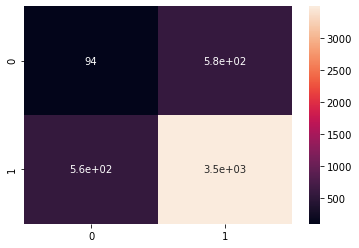

In [9]:
from sklearn.dummy import DummyClassifier
#Define the Classifier and fit it to the train data
dummy_clf = DummyClassifier(random_state = 2, strategy = 'stratified')
dummy_clf.fit(Xe_train, ye_train)
cv_results = cross_validate(dummy_clf, Xe_train, ye_train, cv=5, return_estimator = True)


#Make predictions using cross-validation
ye_pred = cross_val_predict(dummy_clf, Xe_test, ye_test, cv = 5)

# Printing evaluation scores for the Dummy Classifier 
print(classification_report(ye_test, ye_pred))
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .2, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred), annot=True);

Since the data is imbalanced, it does not make sense to interpret accuracy but to focus recall and precision (or the f1 score). Here one can see that the model is good at predicting whether a person will pay back. But, since this class is underrepresented, the model fails to predict incomplete paybacks which is bad since for an investor for he will lose his money. This results in a bad overall model performance.

### 3.5 Feature Selection

We select the best 5 resp. 10 features by using the SelectKBest tool.

In [10]:
# Create and fit selector
best_features = SelectKBest(mutual_info_classif, k=5)
X_smo_5 = best_features.fit_transform(X_smo, np.array(y_smo).ravel())
# Get columns to keep and create new dataframe with those only
cols = best_features.get_support(indices=True)
X_smo_5 = X_smo.iloc[:,cols]
X_smo_5 = pd.DataFrame(X_smo_5)

In [11]:
X_smo_5.head()

,loan_amnt,int_rate,open_acc,revol_util,total_acc
0,-0.607143,-0.213768,0.833333,0.688034,0.466667
1,1.025510,-0.891304,0.500000,-0.241453,0.666667
2,-0.709184,-0.125000,-1.000000,0.108974,-0.533333
3,-0.198980,-0.262681,-0.333333,0.230769,-0.600000
4,0.387755,-1.094203,1.000000,-0.914530,1.066667


In [12]:
# Create and fit selector
best_features = SelectKBest(mutual_info_classif, k=12)
X_smo_10 = best_features.fit_transform(X_smo, np.array(y_smo).ravel())
# Get columns to keep and create new dataframe with those only
cols = best_features.get_support(indices=True)
X_smo_10 = X_smo.iloc[:,cols]
X_smo_10 = pd.DataFrame(X_smo_10)

In [13]:
X_smo_10.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,issue_d,dti,inq_last_6mths,open_acc,revol_util,total_acc
0,-0.607143,-0.571429,-0.213768,-0.572486,0.0,0.8001,0.0,-0.371154,-1.0,0.833333,0.688034,0.466667
1,1.025510,1.061224,-0.891304,0.449072,-0.5,-0.2999,-1.0,-1.131731,0.0,0.500000,-0.241453,0.666667
2,-0.709184,-0.673469,-0.125000,-0.695438,0.0,-0.7749,-2.0,0.119231,-1.0,-1.000000,0.108974,-0.533333
3,-0.198980,-0.163265,-0.262681,-0.073933,0.0,-0.6749,-1.0,0.975000,1.0,-0.333333,0.230769,-0.600000
4,0.387755,0.423469,-1.094203,0.533225,-0.5,1.2501,0.0,0.604808,1.0,1.000000,-0.914530,1.066667


issue_d is dropped because it has no predictive value for the target taking into account that an investor will only know the current year a borrower begs for money.
loan_amnt is dropped because it's redundant to funded_amnt.

In [14]:
X_smo_10.drop(['issue_d', 'loan_amnt'], axis = 1, inplace = True)

In [15]:
X_smo_10.columns

Index(['funded_amnt', 'int_rate', 'installment', 'grade', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc'],
      dtype='object')

In [16]:
#Adapt the test data with the corresponding variables
X_test_5 = Xe_test[['int_rate', 'loan_amnt', 'open_acc', 'revol_util', 'total_acc']]
X_test_10 = Xe_test[['funded_amnt', 'int_rate', 'installment', 'grade', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc']]

In [17]:
X_smo_5.to_csv('X_smo_5.csv')
X_smo_10.to_csv('X_smo_10.csv')
pd.DataFrame(y_smo).to_csv('y_smo.csv')

### 3.6 Logistic Regression Model 5 Features

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_clf = LogisticRegression(penalty = 'elasticnet', solver = 'saga', n_jobs = -1, random_state = 0)

We will use GridSearchCV to identify the best logistic regression model.

In [20]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': np.arange(0.1,1),
             'max_iter': np.arange(1000, 10000),
             'l1_ratio': np.arange(0, 1), 
             'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid = RandomizedSearchCV(log_clf, param_grid, cv = 5, verbose = 5)
grid.fit(X_smo_5, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.9s
[CV] max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.5s
[CV] max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV]  max_iter=9168, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.5s
[CV] max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.5s
[CV] max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=8982, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=5196, l1_ratio=0, class_weight={0: 0.9, 1: 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.6s finished


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, penalty='elasticnet',
                                                random_state=0, solver='saga'),
                   param_distributions={'C': array([0.1]),
                                        'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
   

In [21]:
best_log_5 = grid.best_params_
best_log_5

{'max_iter': 8659, 'l1_ratio': 0, 'class_weight': {0: 0.5, 1: 0.5}, 'C': 0.1}

Applying the best model to the data with 5 features:

In [22]:
best_log_5 = LogisticRegression(C=0.1, class_weight= {0: 0.3, 1: 0.7}, l1_ratio=0, max_iter=8322,
                   n_jobs=-1, penalty='elasticnet', random_state=0,
                   solver='saga')
best_log_5.fit(X_smo_5, y_smo)
ye_pred = best_log_5.predict(X_test_5)

F beta Score for both classes:
0.77


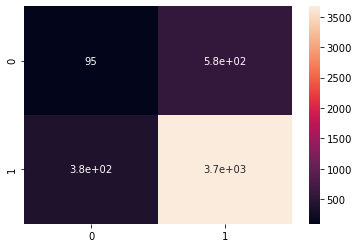

In [23]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred), annot=True);

### 3.7 Logistic Regression Model 10 Features

In [24]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': np.arange(0.1,1),
             'max_iter': np.arange(1000, 10000),
             'l1_ratio': np.arange(0, 1), 
             'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid = RandomizedSearchCV(log_clf, param_grid, cv = 5, verbose = 5)
grid.fit(X_smo_10, y_smo)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.501, total=   0.2s
[CV] max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.2s
[CV] max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.501, total=   0.2s
[CV] max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.501, total=   0.2s
[CV] max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  max_iter=8071, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.2s
[CV] max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.501, total=   0.2s
[CV] max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.2s
[CV] max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.501, total=   0.2s
[CV] max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.501, total=   0.2s
[CV] max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2163, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.2s
[CV] max_iter=8897, l1_ratio=0, class_we

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.5s finished


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, penalty='elasticnet',
                                                random_state=0, solver='saga'),
                   param_distributions={'C': array([0.1]),
                                        'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
   

In [25]:
best_log_10 = grid.best_params_
best_log_10

{'max_iter': 8897, 'l1_ratio': 0, 'class_weight': {0: 0.5, 1: 0.5}, 'C': 0.1}

In [26]:
best_log_10 = LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, l1_ratio=0, max_iter=7812,
                   n_jobs=-1, penalty='elasticnet', random_state=0,
                   solver='saga')
best_log_10.fit(X_smo_10, y_smo)
ye_pred = best_log_10.predict(X_test_10)

In [27]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .1, average = 'weighted').round(2))

F beta Score for both classes:
0.82


The model with more features is better. Next, we'll try a KNN.

### 3.8 K-Nearest-Neighbours 5 Features

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs = -1)

Again, we use RandomizedSearchCV to find the best model.

In [29]:
param_grid = {
             'metric': ['euclidean', 'manhattan', 'minkowski'],
             'weights': ['uniform','distance'],
            'n_neighbors': [5, 10, 50, 100],}

grid = RandomizedSearchCV(knn_clf, param_grid, cv = 5, verbose = 5)
grid.fit(X_smo_5, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.730, total=   0.4s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.713, total=   0.3s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.715, total=   0.3s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.709, total=   0.3s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.712, total=   0.3s
[CV] weights=distance, n_neighbors=10, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=10, metric=manhattan, score=0.770, total=   0.1s
[CV] weights=distance, n_neighbors=10, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=10, metric=manhattan, score=0.755, total=   0.1s
[CV] weights=distance, n_neighbors=10, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=10, metric=manhattan, score=0.756, total=   0.1s
[CV] weights=distance, n_neighbors=10, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=10, metric=manhattan, score=0.750, total=   0.1s
[CV] weights=distance, n_neighbors=10, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=10, metric=manhattan, score=0.758, total=   0.2s
[CV] weights=distance, n_neighbors=10, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=10, metric=euclidean, score=0.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.0s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [5, 10, 50, 100],
                                        'weights': ['uniform', 'distance']},
                   verbose=5)

In [30]:
best_knn_5 = grid.best_params_
best_knn_5

{'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan'}

In [31]:
best_knn_5 = KNeighborsClassifier(n_jobs = -1, n_neighbors = 5, metric = 'manhattan', weights = 'uniform')
best_knn_5.fit(X_smo_5, y_smo)
ye_pred = best_knn_5.predict(X_test_5)

In [32]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .2, average = 'weighted').round(2))

F beta Score for both classes:
0.76


Ok, that's nothing. Let's try our best 10 features.

### 3.9 K-Nearest-Neighbours 10 Features

In [33]:
param_grid = {
             'metric': ['euclidean', 'manhattan', 'minkowski'],
             'weights': ['uniform','distance'],
            'n_neighbors': [5, 10, 50, 100],}

grid = RandomizedSearchCV(knn_clf, param_grid, cv = 5, verbose= 5)
grid.fit(X_smo_10, y_smo)
best_knn_10 = grid.best_params_
best_knn_10

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=uniform, n_neighbors=10, metric=minkowski ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, n_neighbors=10, metric=minkowski, score=0.730, total=   0.6s
[CV] weights=uniform, n_neighbors=10, metric=minkowski ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=10, metric=minkowski, score=0.746, total=   0.5s
[CV] weights=uniform, n_neighbors=10, metric=minkowski ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=10, metric=minkowski, score=0.733, total=   0.5s
[CV] weights=uniform, n_neighbors=10, metric=minkowski ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=10, metric=minkowski, score=0.739, total=   0.6s
[CV] weights=uniform, n_neighbors=10, metric=minkowski ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=10, metric=minkowski, score=0.738, total=   0.5s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................
[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.782, total=   0.5s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................
[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.793, total=   0.5s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................
[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.786, total=   0.5s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................
[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.793, total=   0.5s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................
[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.782, total=   0.5s
[CV] weights=uniform, n_neighbors=100, metric=manhattan ..............
[CV]  weights=uniform, n_neighbors=100, metric=manhattan, score=0.657, tota

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.3s finished


{'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'}

In [34]:
best_knn_10 = grid.best_params_
best_knn_10

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'}

In [35]:
best_knn_10 = KNeighborsClassifier(n_jobs = -1, n_neighbors = 50, metric = 'manhattan', weights = 'distance')
best_knn_10.fit(X_smo_10, y_smo)
ye_pred = best_knn_10.predict(X_test_10)

In [36]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .1, average = 'weighted').round(2))

F beta Score for both classes:
0.8


### 3.10 Ensemble: AdaBoost

The best of the base models above, the logistic regression with 10 features are now boosted in the hope that this improves performance.

In [37]:
best_log = LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, l1_ratio=0, max_iter=7812,
                   n_jobs=-1, penalty='elasticnet', random_state=0,
                   solver='saga')
best_log.fit(X_smo_10, y_smo)
ye_pred = best_log.predict(X_test_10)

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
from sklearn.metrics import make_scorer 

clf_boost = AdaBoostClassifier(base_estimator=best_log) 

param_grid = {'n_estimators':np.arange(1, 150),                
              'learning_rate':np.arange(0.1, 1),                          
             } 
grid = RandomizedSearchCV(clf_boost, param_grid, verbose = 5) 
grid.fit(X_smo_10, y_smo)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=64, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. n_estimators=64, learning_rate=0.1, score=0.629, total=  18.6s
[CV] n_estimators=64, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.6s remaining:    0.0s


[CV] .. n_estimators=64, learning_rate=0.1, score=0.642, total=  18.8s
[CV] n_estimators=64, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.4s remaining:    0.0s


[CV] .. n_estimators=64, learning_rate=0.1, score=0.633, total=  18.2s
[CV] n_estimators=64, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.6s remaining:    0.0s


[CV] .. n_estimators=64, learning_rate=0.1, score=0.634, total=  18.4s
[CV] n_estimators=64, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV] .. n_estimators=64, learning_rate=0.1, score=0.629, total=  19.5s
[CV] n_estimators=7, learning_rate=0.1 ...............................
[CV] ... n_estimators=7, learning_rate=0.1, score=0.625, total=   2.1s
[CV] n_estimators=7, learning_rate=0.1 ...............................
[CV] ... n_estimators=7, learning_rate=0.1, score=0.638, total=   2.2s
[CV] n_estimators=7, learning_rate=0.1 ...............................
[CV] ... n_estimators=7, learning_rate=0.1, score=0.631, total=   2.1s
[CV] n_estimators=7, learning_rate=0.1 ...............................
[CV] ... n_estimators=7, learning_rate=0.1, score=0.634, total=   2.1s
[CV] n_estimators=7, learning_rate=0.1 ...............................
[CV] ... n_estimators=7, learning_rate=0.1, score=0.629, total=   2.0s
[CV] n_estimators=35, learning_rate=0.1 ..............................
[CV] .. n_estimators=35, learning_rate=0.1, score=0.627, total=  10.5s
[CV] n_estimators=35, learning_rate=0.1 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.0min finished


RandomizedSearchCV(estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1,
                                                                                  class_weight={0: 0.5,
                                                                                                1: 0.5},
                                                                                  l1_ratio=0,
                                                                                  max_iter=7812,
                                                                                  n_jobs=-1,
                                                                                  penalty='elasticnet',
                                                                                  random_state=0,
                                                                                  solver='saga')),
                   param_distributions={'learning_rate': array([0.1]),
                                        'n_est

In [40]:
best_boost_model = grid.best_params_
best_boost_model

{'n_estimators': 138, 'learning_rate': 0.1}

In [41]:
best_boost = AdaBoostClassifier(base_estimator=best_log, n_estimators = 43, learning_rate = 0.1) 
best_boost.fit(X_smo_10, y_smo)
ye_pred = best_boost.predict(X_test_10)

F beta Score for both classes:
0.81


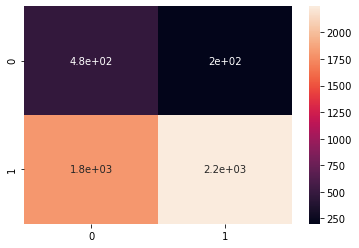

In [42]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred), annot=True);

The AdaBoost is worse than the best logistic regression model.

### 3.11 Ensemble: Stacking

In [43]:
from sklearn.ensemble import StackingClassifier

In [44]:
best_knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 50, metric = 'manhattan', weights = 'distance')

In [45]:
estimators = [
    ('bestlog', best_log), 
    ('bestknn', best_knn)]
model = StackingClassifier(estimators, final_estimator=LogisticRegression(), cv=5, 
                           stack_method='auto', n_jobs=-1, verbose=5)
model.fit(X_smo_10, y_smo);

F beta Score for both classes:
0.78


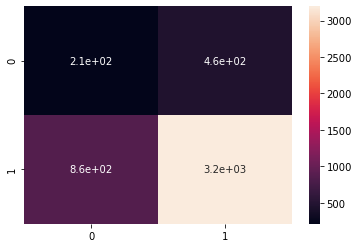

In [46]:
ye_pred = model.predict(X_test_10)
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred), annot=True);

Stacking is also not as good as the logistic regression model.